# Versuch 6 (2022-Version)
## Dissoziationsgleichgewicht von $\mathrm{N}_2\mathrm{O}_4$
Zu Beginn werden alle für die Auswertung notwendigen Module importiert. Welche Module könntet ihr wie üblich für die Auswertung brauchen? Die allgemeinen bereits bekannten und vorausgetzten Python-Kompetenzen könnt ihr unter [Anforderungen.ipynb](Anforderungen.ipynb) nachlesen. Dort sind auch einige Ratschläge bspw. zum Exportieren von Grafiken oder Hinweise zu <code>NumPy</code> aufgeführt.

Falls euch nachträglich Module einfallen, könnt ihr diese jederzeit hier ergänzen. Achtet dabei aber darauf, den entsprechenden Code dann auch erneut auszuführen!

In [1]:
from Hilfsdateien.importe_Bibliotheken import *

Außerdem könnten einige Naturkonstanten später in der Auswertung hilfreich sein. Diese können wir aus <code>scipy.constants</code> importieren. Hilfreich kann außerdem sein, weitere Konstanten wie den Studentschen $t$-Wert zu Beginn zu definieren und Konstanten wie $\epsilon$ zu definieren. Achtet wenn notwendig auf die Einheiten!

In [2]:
from Hilfsdateien.importe_Konstanten import *
epsilon = 15.9 #m² /mol
l = 2.2e-02 #m
delta_l = 1.0e-03 #m
delta_T = 0.1 #K
delta_p = 100 #Pa

#War mir gegeben worden
p_offset = -12

### Erster Auswertungsschritt
Wie üblich wollen wir zunächst alle unsere Messdaten einlesen. Es wird davon ausgegangen, dass in einer Datei das breite Absorptionsspektrum gespeichert ist und in je einer Datei pro Temperatur die Absorptionsspektren bei den verschiedenen Drücken gespeichert sind. Zu Beginn wollen wir das breite Absorptionsspektrum einlesen. Mit welchem Befehl geschieht dies üblicherweise und welche Optionen könnten für uns nützlich sein?

In [3]:
data_dir = "data_v6/"
#Kein aktuelles Spektrum steht zur Verfügung!
#Ich nehme gerne ein neues Spektrum als Referenz an!
#absorption = np.genfromtxt(data_dir + "absorbanz.dat",skip_header=1,dtype=float)

Im nächsten Auswertungsschritt ist die Absorbanz $A$ gegen die Wellenlänge $\lambda$ von euch zu plotten. Vergesst nicht die Achsenbeschriftung, Legende, etc.!

In [4]:
#Da leider kein Spektrum mir vorliegt, kann ich hier nur beispielhafte auskommentierte Code-Blöcke zeigen.
#plt.plot(absorption[:,0],absorbanz[:,0],label="Messwerte")
#plt.xlabel("$\lambda$ / nm")
#plt.ylabel("$A$")
#plt.legend()
#plt.title("Absorptionsspektrum von N$_{2}$O$_{4}$")
#plt.tight_layout()
#plt.show()
#plt.close()

Die einzelnen Messreihen können getrennt vom Absorptionsspektrum in einem 3D-Array aus $n$ Messreihen mit $k$ Zeilen und $j$ Messgrößen (jeder einzelne Druck zählt als eine Messgröße!) gespeichert werden. Daher könnt ihr zunächst mit NumPy ein leeres 3D-Array mit den entsprechenden Dimensionen erstellen.

Außerdem bietet es sich an, ein 1D-Array zu erstellen, in dem alle Temperaturen gespeichert sind und ein 2D-Array, in dem die jeweiligen Drücke gespeichert sind. Diese Daten sind leider manuell abzutippen. Idealerweise nehmt ihr bereits jetzt etwaige notwendige Korrekturen vor.

In [5]:
#Mir liegen nur Messwerte für weniger Temperaturen vor.
#Daher wird die Auswertung nur halbwegs vollständig sein.
#Daher ist n auch 5, da nur 5 Temperaturen

n,k,j = 5,21,9
alle_spektren = np.empty((n,k,j))


T_arr = np.array([25,30,40,55,70]) #°C
#Leider fand ich noch keinen Weg, EINFACH aus den Dateien den Druck zu extrahieren
#Die letzten paar Drücke können ignoriert werden bei 25 °C, da sie nicht eingelesen werden.
#Außerdem sind bei 0 und -9 mbar nur ganz flache Basislinien enthalten
#Von den Studierenden sollen außerdem nur 8 Messungen vorgenommen werden
p25_arr = np.array([307,288,259,225,193,168,132,95,74,46,0,-9]) - p_offset
p30_arr = np.array([322,289,243,193,151,114,69,49]) - p_offset
p40_arr = np.array([207,191,174,142,115,97,77,53]) - p_offset
p55_arr = np.array([222,187,165,149,127,97,78,58]) - p_offset
p70_arr = np.array([213,188,160,147,123,105,81,72,54]) - p_offset

p_arr = np.empty((n,j-1))
for i,p in enumerate([p25_arr[:8],p30_arr,p40_arr,p55_arr,p70_arr[:8]]):
    p_arr[i,:] = p*100 #Pa


In dieses 3D-Array sollen nun die gemessenen Spektren eingelesen werden. Welcher NumPy-Befehl _generiert_ euch Numpy-Arrays von txt,csv,...-Dateien? Da die Wellenlänge pro Druck vermutlich identisch ist, ergibt es Sinn, nur bestimmte Spalten der Messdateien jeweils einzulesen. Wenn ihr euch die Messdatei anschaut, werdet ihr auch sehen, dass die Datei nach der Kopfzeile nur bis zu einer bestimmten Zeile Messdaten enthält. Die unteren Zeilen enthalten nur Metadaten. 

Um das 3D-Array mit Daten zu füllen, könnt ihr mit einer <code>for</code>-Schleife über den Index $n$ iterieren und beim $n$-ten Element die $n$-te Datei einlesen. Mittels <code>enumerate</code> könnten sowohl ein Index als auch der Eintrag in einem Array (z.&nbsp;B. der Dateiname) übergeben werden.

Kontrolliert vor der weiteren Auswertung, ob die Werte in das Array korrekt eingelesen wurden!

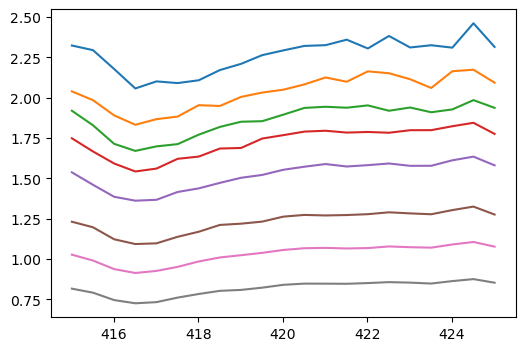

In [6]:

#Die ersten beiden Zeilen sind Kopfzeilen
#Bei 21 verschiedenen Wellenlängen wurde gemessen.
#Den encoding-Teil habe ich auch den Studenten gegeben. Andernfalls wären viele vermutlich verwirrt, was der Fehler sein könnte
for i,temp in enumerate(T_arr):
    alle_spektren[i,:,:] = np.genfromtxt("data_v6_2022/"+str(temp)+"C.csv",skip_header=2,max_rows=21,usecols=(0,1,3,5,7,9,11,13,15),delimiter=",",encoding="latin1")

#Nicht verlangt von den Studierenden, nur für mich als Gegencheck
for k in np.arange(1,j):
    plt.plot(alle_spektren[3,:,0],alle_spektren[3,:,k])
plt.show()
plt.close()

Als Absorbanz soll der Mittelwert über diesen Spektralbereich gewählt werden. Da der Hintergrund bereits vom Spektrometer abgezogen wurde, ist keine Basislinienkorrektur erforderlich. $\Delta A$ entspricht dem Standardfehler des Mittelwerts der Messwerte. Es bietet sich an, ein neues 3D-Array für $A$ zu erstellen, welches $A$ und $\Delta A$ bei den jeweiligen Drücken für alle Temperaturen enthält.

In [7]:
#n Temperaturen, j-1 Drücke, 2 da A und Delta A
absorbanz = np.empty((n,j-1,2))
for i in np.arange(n):
    #1: da wir nicht über lambda mitteln
    absorbanz[i,:,0],absorbanz[i,:,1] = np.mean(alle_spektren[i,:,1:],axis=0),np.std(alle_spektren[i,:,1:],axis=0,ddof=1)/np.sqrt(len(alle_spektren[i,:,1:]))
print(absorbanz)

[[[2.043 0.025]
  [1.974 0.024]
  [1.863 0.022]
  [1.713 0.021]
  [1.557 0.02 ]
  [1.424 0.018]
  [1.22  0.016]
  [0.976 0.013]]

 [[2.277 0.023]
  [2.152 0.024]
  [1.953 0.025]
  [1.678 0.021]
  [1.423 0.018]
  [1.178 0.015]
  [0.834 0.011]
  [0.65  0.009]]

 [[1.978 0.024]
  [1.88  0.023]
  [1.763 0.021]
  [1.529 0.019]
  [1.31  0.017]
  [1.155 0.015]
  [0.972 0.012]
  [0.741 0.01 ]]

 [[2.262 0.023]
  [2.034 0.023]
  [1.863 0.021]
  [1.725 0.02 ]
  [1.519 0.018]
  [1.229 0.015]
  [1.03  0.013]
  [0.818 0.01 ]]

 [[2.295 0.023]
  [2.105 0.022]
  [1.871 0.02 ]
  [1.744 0.02 ]
  [1.51  0.018]
  [1.32  0.016]
  [1.071 0.013]
  [0.969 0.012]]]


Nachdem die mittlere Absorbanz inklusive Unsicherheit bei den jeweiligen Drücken für alle Temperaturen bestimmt wurde, ist mittels einer geigneten Auftragung $\epsilon$ zu bestimmen. Dies gelingt mittels einer linearen Regression, bei der $\epsilon$ aus dem Ordinatenschnittpunkt abgeleitet werden kann. Welche im Skript aufgeführte Gleichung bietet sich hierfür an? Denkt wie immer beim Erstellen der Abbildung auch an die entsprechenden Fehlerbalken, Legendeneinträge, etc.! Es bietet sich an, die Messwerte bei der höchsten Temperatur zur Bestimmung zu nutzen.

0.022714966505519622
[22500. 20000. 17200. 15900. 13500. 11700.  9300.  8400.]
-0.9572431892757295
-1.204580495075229e-05


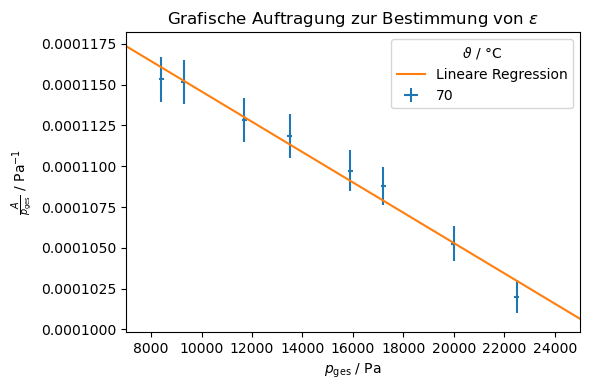

In [8]:
#Wie im Skript direkt aufgeführt, ist A/p_ges gegen p_ges aufzutragen. Es wird epsilon aus dem Ordinatenschnittpunkt erhalten.
#Soll wohl idealweweise nur für die höchste T gemacht werden

#Der Gradient und die variierenden Marker werden von den Studierenden NICHT erwartet
print(absorbanz[-1,0,1])
print(p_arr[-1,:])
print(absorbanz[-1,-1,1]-absorbanz[-1,-1,0])
plt.errorbar(x=p_arr[-1,:],y=absorbanz[-1,:,0]/p_arr[-1,:],xerr=delta_p,yerr=np.sqrt((absorbanz[-1,:,-1]/p_arr[-1,:])**2 + (absorbanz[-1,:,-1]/p_arr[-1,:]**2 *delta_p)**2),ls="None",label=str(T_arr[-1]))
fit = linregress(p_arr[-1,:],absorbanz[-1,:,0]/p_arr[-1,:])
#Besser wäre es Ausgleichsgeraden zu ziehen, erfahrungsgemäß verlangt die aber niemand!
print(fit.slope*R*(T_arr[-1]+273.15)/l/10) #dm³/(mol*cm-2)
plt.plot(np.arange(7000,25000),np.arange(7000,25000)*fit.slope + fit.intercept,label="Lineare Regression")
plt.legend(title=r"$\vartheta$ / °C")
plt.ylabel(r"$\frac{A}{p_\mathrm{ges}} $ / Pa$^{-1}$")
plt.xlabel(r"$p_{\mathrm{ges}}$ / Pa")
plt.title(r"Grafische Auftragung zur Bestimmung von $\epsilon$")
plt.xlim(7000,25000)
plt.tight_layout()
plt.show()
plt.close()

Wir betrachten den y-Achsenschnittpunkt $b$, $p_\mathrm{ges}$, $\epsilon$ und $d$ als voneinander unabhängige Größen. Daher können wir $\Delta\epsilon$ aus einer Gauß'schen Fehlerfortpflanzung von $\epsilon$ erhalten. Hierzu wollen wir SymPy nutzen, welches uns ermöglicht eine Funktion $\epsilon(d,T,p_\mathrm{ges},b)$ nach
\begin{align}
\epsilon = \frac{b\cdot R\cdot T}{d}
\end{align}
zu erstellen und die Ableitungen von $\epsilon$ zu ermitteln. Zunächst müssen die Variablen als „Symbole“ für SymPy definiert werden. Wie könnt ihr dies machen? Nachdem wir die Ausdrücke definiert haben, müssen diese mittels eines weiteren SymPy-Befehls in aufrufbare Funktionen überführt werden (GIYF, eine [anonyme Funktion](https://de.wikipedia.org/wiki/Anonyme_Funktion) wird oftmals lambda-Funktion genannt!). An diese Funktionen können wir dann die Messwerte übergeben und erhalten $\epsilon$ und $\Delta\epsilon$ als Ergebnis.

In [9]:
b,db,T,dT,d,dd = symbols("b db T dT d dd")

eps = b*R*T/d
deps = sqrt((diff(eps,b)*db)**2 + (diff(eps,T)*dT)**2 + (diff(eps,d)*dd)**2)

epsil = lambdify([b,T,d],eps,'scipy')
depsil = lambdify([b,db,T,dT,d,dd],deps,'scipy')

epsilon = np.array([epsil(fit.intercept,T_arr[-1]+273.15,l),depsil(fit.intercept,fit.intercept_stderr,T_arr[-1]+273.15,delta_T,l,delta_l)])
print(epsilon*10) # dm**3/(mol*cm**(-2))

[160.648   7.379]


## Zweiter Auswertungsschritt 
Nun ist es von euch gefordert, eine Apparaturkonstante $a$ für jede Temperatur zu bestimmen. Diese wird nach der im Skript gegebenen Gleichung
\begin{align}
a = \frac{\epsilon\cdot d}{R\cdot T}
\end{align}
 mit der universellen Gaskonstanten $R$ und einer Küvettenlänge $d$ aus dem Extinktionskoeffizienten $\epsilon$ bei einer Temperatur $T$ erhalten. Analog zu $A$ solltet ihr mit SymPy nun je eine Funktion erstellen, welche euch $a$ und daraus dessen Unsicherheit $\Delta a$ berechnet. Muss der Wert bei 70 °C berechnet werden?

In [10]:
ep,dep,lo,dl,T,dT = symbols('ε Δε lo Δl T ΔT')
a = ep*lo/(R*T)
da = sqrt((diff(a,ep)*dep)**2 + (diff(a,lo)*dl)**2 + (diff(a,T)*dT)**2)

a = lambdify([ep,lo,T],a,'numpy')
da = lambdify([ep,dep,lo,dl,T,dT],da,'numpy')

a_arr = np.empty((n,2))
a_arr[:,0],a_arr[:,1] = a(epsilon[0],l,T_arr[:]+273.15), da(epsilon[0],epsilon[1],l,delta_l,T_arr[:]+273.15,delta_T) #pro Pa

print(epsilon)
print(160*(10**-3)/(10**-2))
print(a_arr*10**5) #pro bar

[16.065  0.738]
16.0
[[14.257  0.921]
 [14.022  0.906]
 [13.574  0.877]
 [12.954  0.837]
 [12.387  0.801]]


## Dritter Auswertungsschritt
Nachfolgend sollt ihr für alle Messpunkte die Absorbanz und anhand dieser den Partialdruck $p\left(\mathrm{NO}_2\right)$ (Formel steht im Praktikumsskript) bestimmen. Wie helfen euch hierbei die soeben erstellten Funktionen? Analog zu $A$ und $a$ solltet ihr SymPy für diesen Schritt nutzen.

In [11]:
Abs, dAbs, apConst,dapConst = symbols('A ΔA a Δa')
pNO2 = Abs/apConst
dpNO2 = sqrt((diff(pNO2,Abs)*dAbs)**2 +  (diff(pNO2,apConst)*dapConst)**2)

pNO2 = lambdify([Abs,apConst],pNO2,'numpy')
dpNO2 = lambdify([Abs,dAbs,apConst,dapConst],dpNO2,'numpy')
p_NO2 = np.empty((n,k,2))


for i in range(n):
    p_NO2[i,:,0],p_NO2[i,:,1] = pNO2(absorbanz[i,:,0],a_arr[i,0]),dpNO2(absorbanz[i,:,0],absorbanz[i,:,1],a_arr[i,0],a_arr[i,1])

Um die Gleichgewichtskonstante $K_p$ zu erhalten, brauchen wir jedoch noch den Partialdruck von Distickstofftetraoxid. Wie können wir diesen nun aus dem Gesamtdruck erhalten?

In [12]:
p_N2O4 = np.empty((n,k,2))
for i in range(n):
    p_N2O4[i,:,0] = p_arr[i] - p_NO2[i,:,0]
    #Kann auch mit SymPy gemacht werden. Didaktisch sinnvoller eigtl.
    p_N2O4[i,:,1] = np.sqrt(p_NO2[i,:,1]**2 + 2*delta_p**2)

Nun ist es eure Aufgabe grafisch $K_p$ zu bestimmen. Hierbei gilt es zu beachten, dass die Gerade durch den Ursprung gehen muss (Verständnisfrage: warum?)! Hierzu kann das Modul <code>curve_fit</code> aus SciPy genutzt werden. Die zu fittende Funktion $f(x,m)$ wird zunächst als Python-Funktion definiert. Danach werden diese Funktion, die $x$- und die $y$-Werte an den curve_fit-Befehl übergeben. Neben dem Ergebnis wird auch die Kovarianzmatrix von <code>curve_fit</code> übergeben. Diese kann mittels eines in der Dokumentation aufgeführten Befehl in die Standardabweichung überführt werden.

___Für Fortgeschrittene___: Wenn die $x$-Unsicherheit als Gewichtungsfaktor genutzt werden, bietet sich eine orthogonale Regression mit [scipy.odr](https://docs.scipy.org/doc/scipy/reference/odr.html) an. Hierbei ist ein [Trick](https://stackoverflow.com/a/52408974) notwendig, damit die Gerade auch durch den Ursprung verläuft.

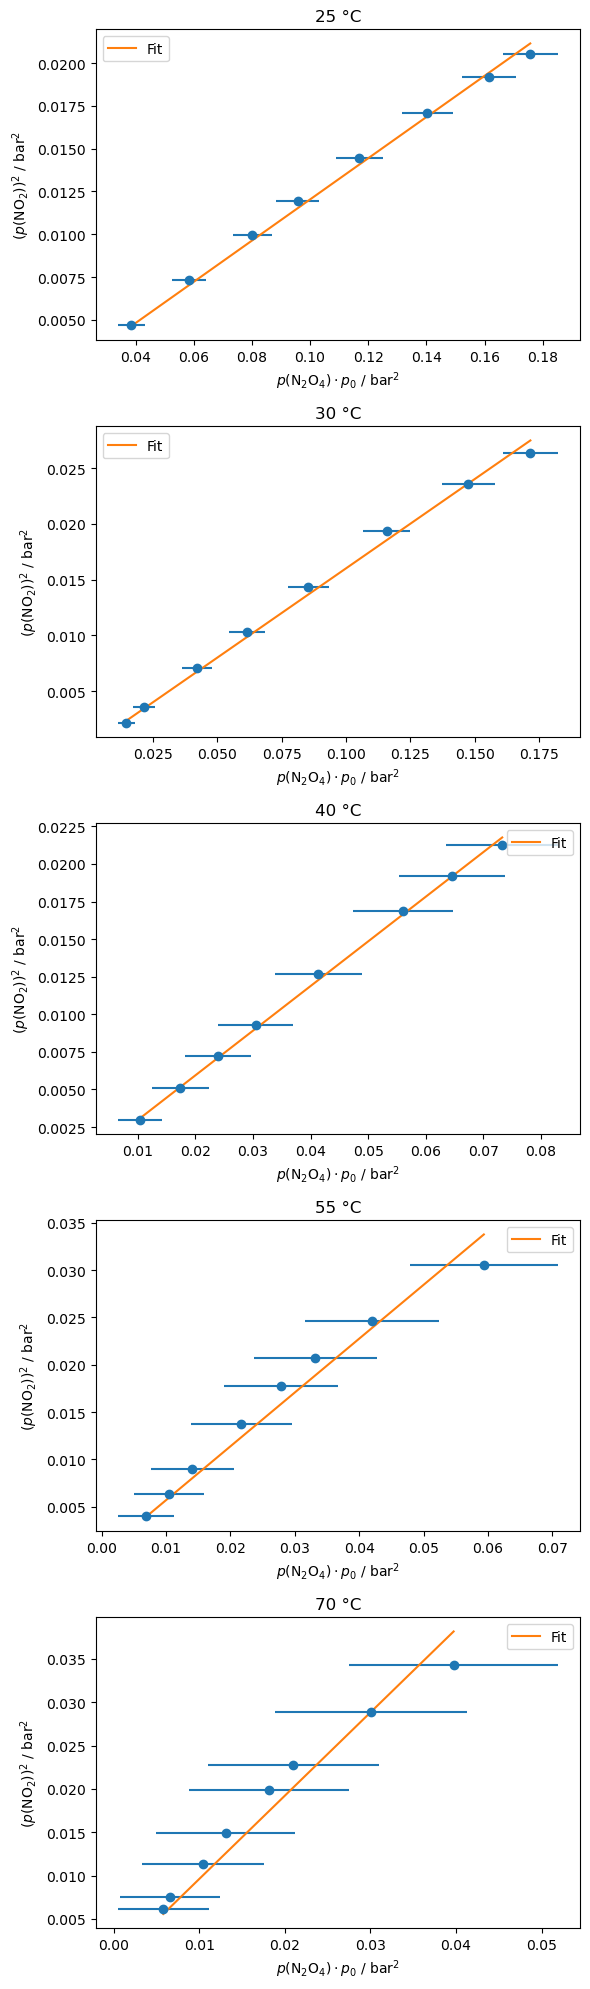

[[0.12  0.001]
 [0.16  0.002]
 [0.297 0.002]
 [0.569 0.02 ]
 [0.961 0.038]]


In [13]:
#Die Subplots sind nur HIER sinnvoll, da im Protokoll vermutlich nicht eine Grafik mit fünf
#Reihen erscheinen soll. Muss von den Studierenden aufgetrennt werden oder pro Temperatur eine Auftragung
fig,ax=plt.subplots(nrows=n,figsize=(6,4*n))

#Hier ist die Funktion, die an curve_fit übergeben wird
def f(x,p):
    return x*p

#Das Array, in dem die Fit-Parameter gespeichert werden
params = np.empty((n,2))

#Hier werden in einer for-Schleife alle Abb. erstellt
for i in range(n):
    
    #Konversion von Pa in bar für die Auftragung
    x_data = p_N2O4[i,:,0]/10**5
    y_data = (p_NO2[i,:,0]/10**5)**2
    x_err = p_N2O4[i,:,1]/10**5
    y_err = (p_NO2[i,:,1]/10**5)**2
    

    popt,pcov = curve_fit(f,x_data, y_data)
    slope,slope_err = popt,np.sqrt(np.diag(pcov))
    params[i,0],params[i,1] = slope,slope_err
    #print(np.array([[linreg.slope,linreg.stderr],[linreg.intercept,linreg.intercept_stderr]]))
    ax[i].errorbar(x_data,y_data,xerr=x_err,yerr=y_err,ls="None",marker='o')
    ax[i].plot(x_data,slope*x_data,label='Fit')
    #ax[i].plot(x_data,linreg.slope*x_data+linreg.intercept,label="LSTQ")
    ax[i].set_ylabel("$(p(\mathrm{NO}_2))^{2}$ / bar$^{2}$")
    ax[i].set_xlabel("$p(\mathrm{N}_{2}\mathrm{O}_{4}) \cdot p_{0} $ / bar$^{2}$")
    ax[i].legend()
    ax[i].set_title(str(T_arr[i])+ " °C")
plt.tight_layout()
plt.show()
plt.close()

#Gutes Beispiel für den Fall, dass Fehlerbalken größer als die Streuung der Messwerte sind
#und eigentlich Fehlerbalken in Erwägung zu ziehen wären!
##
#Damit nicht manuell durchprobiert wird
#Ausgleichsgerade1
#x2 = x_max - x_err
#y2 = y_max + y_err
#m = y2/x2 (da b=0)
#Ausgleichsgerade2
#x3 = x_max + x_err
#y3 = y_max - y_err
#m = y3/x3 (s.o.)
#Unsicherheit entsprechend als asymmetrischer +- Fehler angebbar
print(params)

## Vierter Auswertungsschritt
Im nächsten Auswertungsschritt ist von euch eine Auftragung von $\ln(K_p)$ gegen $T^{-1}$ anzufertigen. Für die Fehlerbalken müsst ihr die Unsicherheit $\Delta\ln(K_p)$ bestimmen und diese ebenfalls einzeichnen!

In [14]:
#Da ab jetzt alles in Kelvin ist und um Syntax einzusparen.
print(T_arr)
T_arr = T_arr + 273.15


k_p = params[:,0]
dk_p = params[:,1]
print(np.array([k_p,dk_p]))
linreg = linregress(1/T_arr,np.log(k_p))
plt.errorbar(1/T_arr,np.log(k_p),xerr=delta_T/T_arr**2,yerr=dk_p/k_p,marker='o',ls="None",label="Messwerte")
plt.plot(np.linspace(0.0029,0.00345,10**6),linreg.slope*np.linspace(0.0029,0.0035,10**6) + linreg.intercept)
plt.xlabel("$T^{-1}$ / $\mathrm{K}^{-1}$")
plt.ylabel("$\ln(K_p)$")
plt.title("Auftragung zur Bestimmung von $\Delta_\mathrm{R} H$")
plt.tight_layout()
plt.show()
plt.close()

[25 30 40 55 70]
[[0.12  0.16  0.297 0.569 0.961]
 [0.001 0.002 0.002 0.02  0.038]]


Wie könnt ihr aus dieser Auftragung die Reaktionsenthalpie $\Delta_\mathrm{R} H$ erhalten?

In [15]:
H_r = -linreg.slope*R
dH_r = linreg.stderr*R


## Fünfter Auswertungsschritt
Als nächste Größe sind wir an der Reaktionsentropie $\Delta_\mathrm{R} S$ interessiert, welche ihr laut Aufgabenstellung aus der Steigung einer Auftragung von $R\cdot T\cdot \ln(K_p)$ zu bestimmen habt. Müsst ihr einen bestimmten Faktor berücksichtigen? Bedenkt bei den Fehlerbalken, dass die Unsicherheit $\Delta(R\cdot T\cdot\ln(K_p)$ mittels Gaußscher Fehlerfortpflanzung zu bestimmen ist, da sowohl $K_p$ als auch $T$ zwei voneinander unabhängige fehlerbehaftete Größen sind

In [16]:
kp,dkp = symbols("K_p ΔK_p")
expr = R*T*log(kp)
dexpr = sqrt((diff(expr,kp)*dkp)**2 + (diff(expr,T)*dT)**2)

expr = lambdify([T,kp],expr,"scipy")
dexpr = lambdify([T,dT,kp,dkp],dexpr,"scipy")

rtlnkp = np.empty((n,2))
drtlnkp = np.empty(n)
for index,temp in enumerate(T_arr):
    rtlnkp[index,0] = temp
    rtlnkp[index,1] = expr(temp,k_p[index])
    drtlnkp[index] = dexpr(temp,delta_T,k_p[index],dk_p[index])
    
fit = linregress(rtlnkp[:,0],rtlnkp[:,1])
print(np.array([fit.slope,fit.stderr]))

[114.686   5.448]


In [17]:
plt.errorbar(rtlnkp[:,0],rtlnkp[:,1],yerr=drtlnkp,marker="o",ls="None")
plt.plot(rtlnkp[:,0],rtlnkp[:,0]*fit.slope + fit.intercept,'--')
plt.xlabel("$T$ / K")
plt.ylabel("$R\cdot T\cdot \ln(K_p)$")
plt.show()
plt.close()

---
Arved Dorst, Göttingen, __2022__.